# Efficiency test for Container Polygon's algorithm

In this notebook we will use the three differents algorithms developed to find the container polygon of an arbitrary point in space.

We will show the time elapsed in each of them.

Let's load the files that will be used in this notebook.

In [1]:
include("Operaciones_Basicas.jl")
include("Red_Dual.jl")
include("Separacion_Arreglos_X_Y.jl")
include("Generador_Vecindades_Pto_Arbitrario.jl")
include("Dentro_Fuera_Poligono.jl")
include("Algoritmo_Radio.jl")
include("Algoritmo_Voronoi.jl")
include("Algoritmo_Sin_Acotar.jl")
include("voronoi.jl")

getVoronoiDiagram (generic function with 1 method)

We will use the package "Plots" to visualize the polygons of the Neighborhood and the Voronoi's polygons. So, let's load it.

In [2]:
using Plots
pyplot(); #We use pyplot() because gr() doesn't work always

### Information about the Quasiperiodic Lattice

Create the information of the star vectors required by the GDM algorithm, which determine the symmetry of the quasiperiodic lattice. Also, generate the array that contains the alpha constants and the array with the average distance between stripes.

In [3]:
NSides = 121; #Symmetry of the quasiperiodic lattice

Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors

for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end

Alphas_Array = fill(0.2, NSides); #Array of the alphas constant

Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

### Three metods to get container polygon

First, let's generate the neighborhood of the quasiperiodic lattice around an arbitrary point.

The three metods will work with the same point.

In [10]:
N = 0; #The margin of error to consider

SL = 1e10; #Size of a half side of the square in which the algorithm generate a random point inside it

#Let's get the Neighborhood around an arbitrary point without any special algorithm
@time X, Y, APoint, Dual_Points_Information, Projections = region_Local(N, SL, Average_Distance_Stripes, Star_Vectors, Alphas_Array);
println("There are $(length(X)/4) polygons in the Neighborhood.")

  1.966820 seconds (31.67 M allocations: 1.718 GiB, 26.58% gc time)
There are 7260.0 polygons in the Neighborhood.


In [11]:
N = 0; #The margin of error to consider

SL = 1e10; #Size of a half side of the square in which the algorithm generate a random point inside it

Radius = 2; #Size of the radius to use at the circle centered in the point of interest

@time X_R, Y_R, APoint_R, Dual_Points_Information_R, Projections_R = region_Local_Radio(N, SL, Radius, Average_Distance_Stripes, Star_Vectors, Alphas_Array, APoint);
println("There are $(length(X_R)/4) polygons in the Neighborhood using the Radius Algorithm with Radius = 2.")

  1.924188 seconds (32.02 M allocations: 1.733 GiB, 29.04% gc time)
There are 28.0 polygons in the Neighborhood using the Radius Algorithm with Radius = 2.


In [12]:
N = 0; #The margin of error to consider

SL = 1e10; #Size of a half side of the square in which the algorithm generate a random point inside it

@time X_V, Y_V, APoint_V = region_Local_Voronoi(N, SL, Average_Distance_Stripes, Star_Vectors, Alphas_Array, APoint); #Algoritmo Voronoi
println("There are $(length(X_V)/4) polygons in the Neighborhood using the Voronoi Algorithm.")

  2.012600 seconds (31.67 M allocations: 1.718 GiB, 31.51% gc time)
There are 7260.0 polygons in the Neighborhood using the Voronoi Algorithm.


Now, let's find the container polygon and visualize it.

Without special algorithm
  0.037891 seconds (305.59 k allocations: 16.592 MiB, 30.23% gc time)


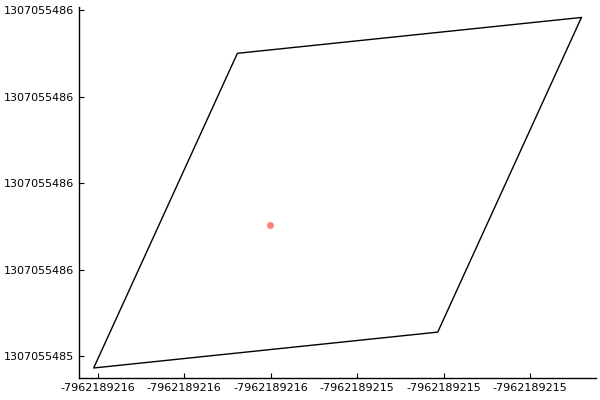

In [13]:
println("Without special algorithm")
#Let's obtain the vertices (P1,P2,P3,P4) of the container polygon and his information
@time P1, P2, P3, P4, Container_Polygon_Information = poligono_Contenedor(X, Y, APoint, Dual_Points_Information, Star_Vectors, Alphas_Array);

#Let's visualize the container polygon
plot()
plot([P1[1], P2[1], P3[1], P4[1], P1[1]], [P1[2], P2[2], P3[2], P4[2], P1[2]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
scatter!([APoint[1]], [APoint[2]], markersize = 5, markeralpha = 0.5, markerstrokewidth = 0, markercolor = :red)

Radius Algorithm
  0.000774 seconds (11.41 k allocations: 581.281 KiB)


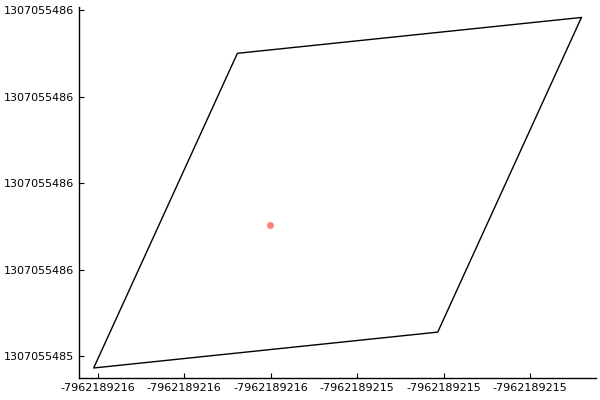

In [14]:
println("Radius Algorithm")
#Let's obtain the vertices (P1,P2,P3,P4) of the container polygon and his information
@time P1_R, P2_R, P3_R, P4_R, Container_Polygon_Information_R = poligono_Contenedor_Radio(X_R, Y_R, APoint_R, Dual_Points_Information_R, Star_Vectors, Alphas_Array);

#Let's visualize the container polygon
plot()
plot([P1_R[1], P2_R[1], P3_R[1], P4_R[1], P1_R[1]], [P1_R[2], P2_R[2], P3_R[2], P4_R[2], P1_R[2]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
scatter!([APoint_R[1]], [APoint_R[2]], markersize = 5, markeralpha = 0.5, markerstrokewidth = 0, markercolor = :red)

Voronoi's Algorithm
  0.255078 seconds (591.18 k allocations: 23.785 MiB, 8.43% gc time)


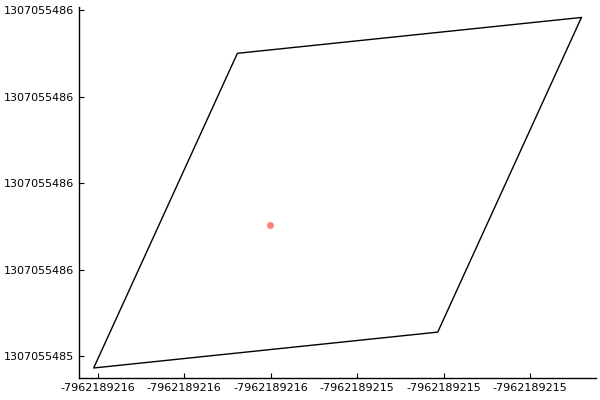

In [15]:
println("Voronoi's Algorithm")
#Let's obtain the polygon structure of the container polygon (as a 4 segment/sides)
@time Container_Polygon_V = poligono_Contenedor_Voronoi(X_V, Y_V, APoint_V);

#Let's visualize the container polygon
plot()
plot([Container_Polygon_V[1].inicio[1], Container_Polygon_V[2].inicio[1], Container_Polygon_V[3].inicio[1], Container_Polygon_V[4].inicio[1], Container_Polygon_V[1].inicio[1]], [Container_Polygon_V[1].inicio[2], Container_Polygon_V[2].inicio[2], Container_Polygon_V[3].inicio[2], Container_Polygon_V[4].inicio[2], Container_Polygon_V[1].inicio[2]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
scatter!([APoint_V[1]], [APoint_V[2]], markersize = 5, markeralpha = 0.5, markerstrokewidth = 0, markercolor = :red)